In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

# Set the aesthetic style of the plots
plt.style.use('fivethirtyeight')
sns.set_palette("deep")

In [20]:
df = pd.read_csv('/Users/shinepark/Desktop/football_visualization/pb5 - Sheet1.csv')

In [35]:
df.head()

,Rk,Gcar,Gtm,Date,Team,Opp,Type,Result,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,86,1,2024-11-07,Connecticut,Boston University,REG (Non-Conf),W 86-32,24,5,...,0,4,4,7,5,1,0,0,13,20.5
1,2,87,2,2024-11-10,Connecticut,South Florida,REG (Non-Conf),W 86-49,28,9,...,0,3,3,1,2,0,1,2,22,20.0
2,3,88,3,2024-11-15,Connecticut,North Carolina,REG (Non-Conf),W 69-58,37,12,...,0,4,4,4,2,0,0,1,29,24.3
3,4,89,4,2024-11-20,Connecticut,FDU,REG (Non-Conf),W 85-41,25,6,...,3,6,9,5,2,0,1,0,16,17.7
4,5,90,5,2024-11-25,Connecticut,Oregon State,REG (Non-Conf),W 71-52,29,9,...,1,2,3,6,1,0,1,0,23,23.0


In [41]:
print("Player Performance Summary:")
print(f"Games played: {len(df)}")
print(f"Average points per game: {df['PTS'].mean():.1f}")
print(f"Average minutes per game: {df['MP'].mean():.1f}")
print(f"Average Game Score: {df['GmSc'].mean():.1f}")

Player Performance Summary:
Games played: 38
Average points per game: 19.9
Average minutes per game: 30.2
Average Game Score: 18.7


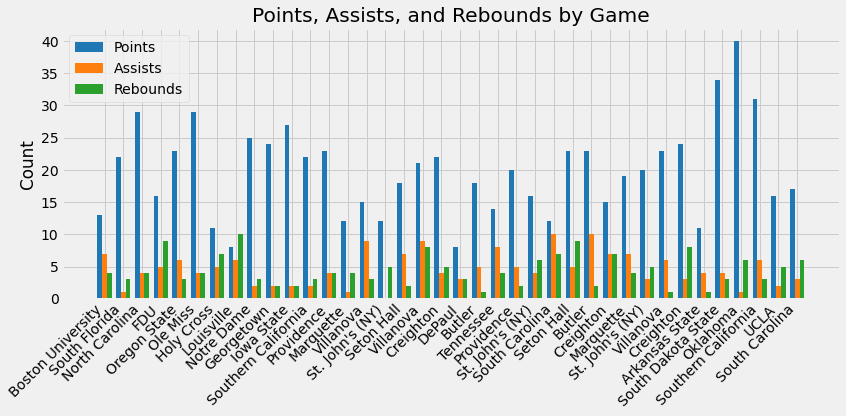

In [43]:
# Points, Assists, Rebounds by Game
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(df))
width = 0.25

ax.bar([i - width for i in x], df['PTS'], width=width, label='Points', color='#1f77b4')
ax.bar(x, df['AST'], width=width, label='Assists', color='#ff7f0e')
ax.bar([i + width for i in x], df['TRB'], width=width, label='Rebounds', color='#2ca02c')

ax.set_xticks(x)
ax.set_xticklabels(df['Opp'], rotation=45, ha='right')
ax.set_ylabel('Count')
ax.set_title('Points, Assists, and Rebounds by Game')
ax.legend()
plt.tight_layout()
plt.show()


<ipython-input-46-deaedb3154c8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Opp'], rotation=45, ha='right')


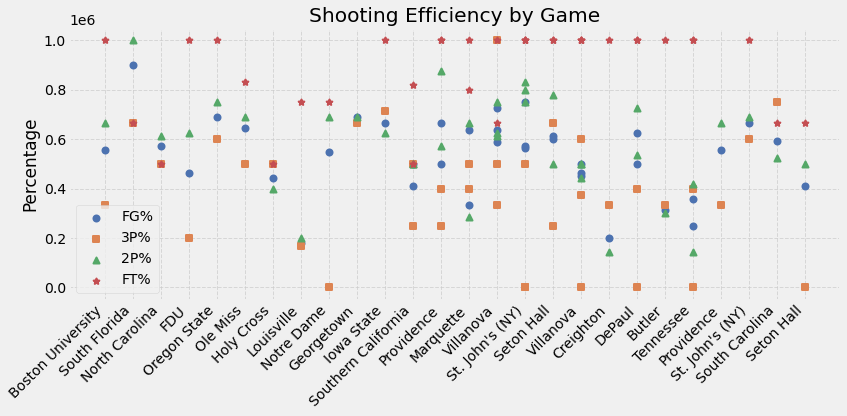

In [46]:
# Shooting Efficiency by Game
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['Opp'], df['FG%'], marker='o', label='FG%', linewidth=2)
ax.scatter(df['Opp'], df['3P%'], marker='s', label='3P%', linewidth=2)
ax.scatter(df['Opp'], df['2P%'], marker='^', label='2P%', linewidth=2)
ax.scatter(df['Opp'], df['FT%'], marker='*', label='FT%', linewidth=2)

ax.set_xticklabels(df['Opp'], rotation=45, ha='right')
ax.set_ylabel('Percentage')
ax.set_title('Shooting Efficiency by Game')
ax.legend(loc = 'best')
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

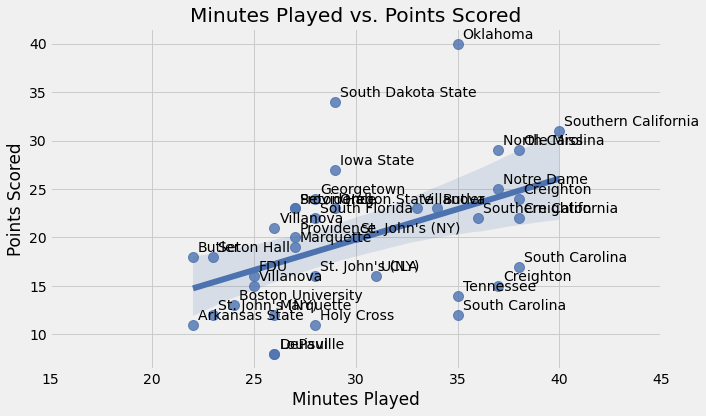

In [49]:
# Minutes Played vs. Points Scored
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='MP', y='PTS', data=df, scatter_kws={'s': 100}, ax=ax)
ax.set_xlabel('Minutes Played')
ax.set_ylabel('Points Scored')
ax.set_title('Minutes Played vs. Points Scored')

for i, row in df.iterrows():
    ax.annotate(row['Opp'], 
                (row['MP'], row['PTS']),
                xytext=(5, 5),
                textcoords='offset points')

plt.xlim(15, 45)

plt.tight_layout()
plt.show()

<ipython-input-50-436065b859ce>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


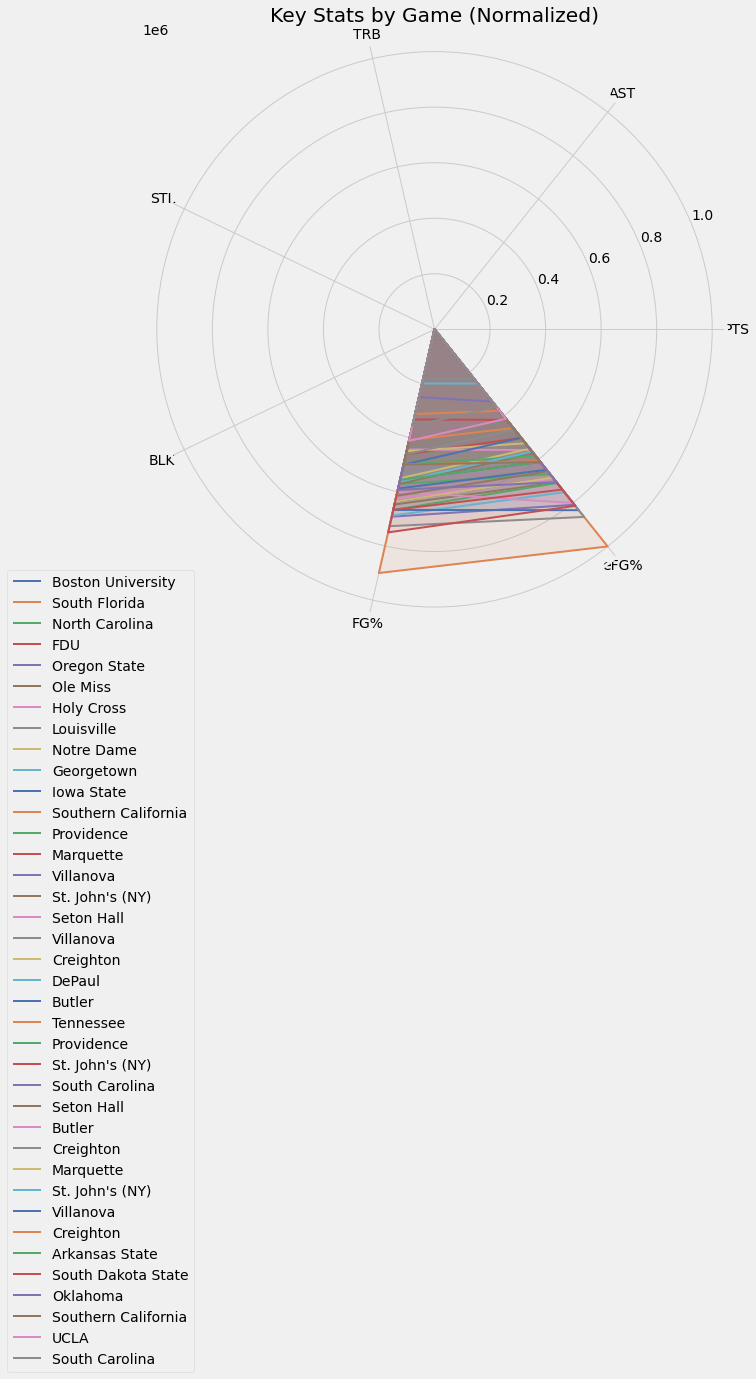

In [50]:
# Radar Chart of Key Stats by Game
categories = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%']

df_radar = df[categories].copy()
# percentage columns(between 0-1)
# count columns,normalize to max
for col in ['PTS', 'AST', 'TRB', 'STL', 'BLK']:
    max_val = df_radar[col].max()
    if max_val > 0:  # Avoid division by zero
        df_radar[col] = df_radar[col] / max_val

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  

# each game
for i, row in df_radar.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  
    ax.plot(angles, values, linewidth=2, label=df['Opp'][i])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Key Stats by Game (Normalized)')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

<ipython-input-54-b2bc78f4cfdb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Opp'], rotation=45, ha='right')


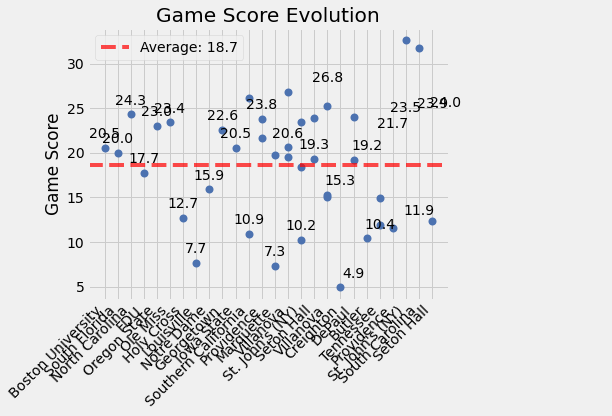

In [54]:
# Game Score Evolution
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Opp'], df['GmSc'], marker='o', linewidth=2)
ax.set_ylabel('Game Score')
ax.set_title('Game Score Evolution')
ax.set_xticklabels(df['Opp'], rotation=45, ha='right')

# average line
avg_gmscore = df['GmSc'].mean()
ax.axhline(y=avg_gmscore, color='r', linestyle='--', alpha=0.7, label=f'Average: {avg_gmscore:.1f}')

for i, row in df.iterrows():
    ax.annotate(f"{row['GmSc']:.1f}", 
                (i, row['GmSc']),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center')

ax.legend()
plt.tight_layout()
plt.show()

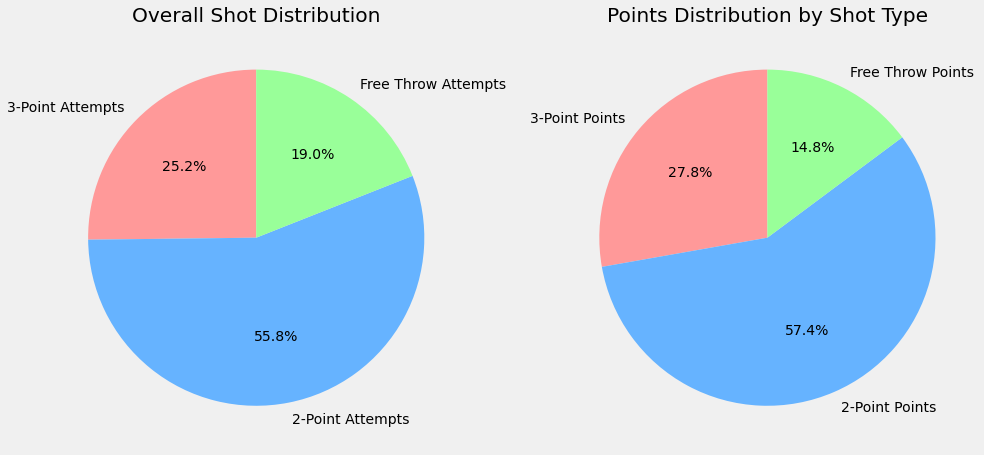

In [55]:
# Shot Distribution Pie Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# overall shot
shots_data = [df['3PA'].sum(), df['2PA'].sum(), df['FTA'].sum()]
shots_labels = ['3-Point Attempts', '2-Point Attempts', 'Free Throw Attempts']
colors = ['#ff9999','#66b3ff','#99ff99']

ax1.pie(shots_data, labels=shots_labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Overall Shot Distribution')

# points
points_data = [df['3P'].sum() * 3, df['2P'].sum() * 2, df['FT'].sum()]
points_labels = ['3-Point Points', '2-Point Points', 'Free Throw Points']

ax2.pie(points_data, labels=points_labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Points Distribution by Shot Type')

plt.tight_layout()
plt.show()

<ipython-input-57-a4d4836e187b>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Opp'], rotation=45, ha='right')


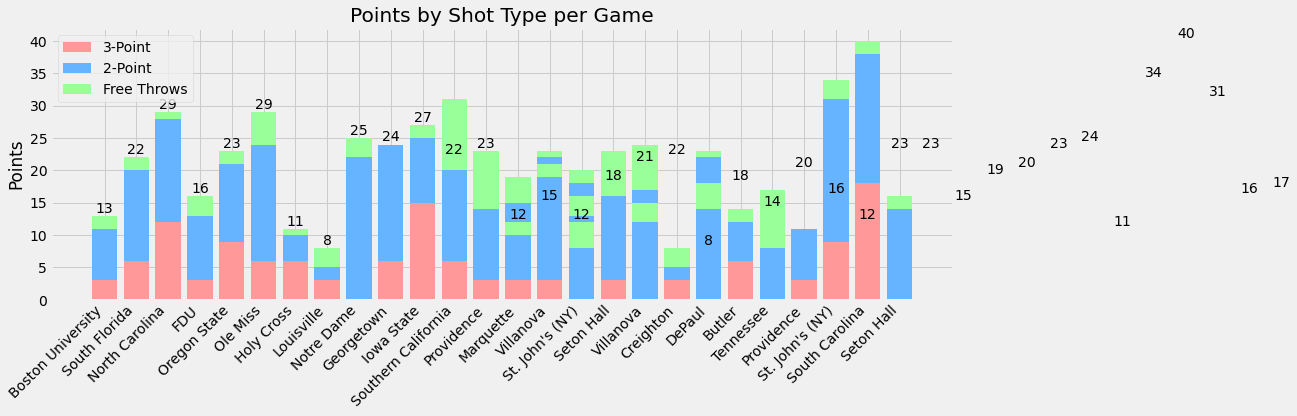

In [57]:
# Points by Shot Type per Game
fig, ax = plt.subplots(figsize=(20, 6))

# points by type
points_3p = df['3P'] * 3
points_2p = df['2P'] * 2
points_ft = df['FT']

bottom_bars = np.zeros(len(df))

p1 = ax.bar(df['Opp'], points_3p, label='3-Point', color='#ff9999')
bottom_bars += points_3p

p2 = ax.bar(df['Opp'], points_2p, bottom=bottom_bars, label='2-Point', color='#66b3ff')
bottom_bars += points_2p

p3 = ax.bar(df['Opp'], points_ft, bottom=bottom_bars, label='Free Throws', color='#99ff99')

for i, total in enumerate(df['PTS']):
    ax.text(i, total + 0.5, str(int(total)), ha='center')

ax.set_ylabel('Points')
ax.set_title('Points by Shot Type per Game')
ax.set_xticklabels(df['Opp'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

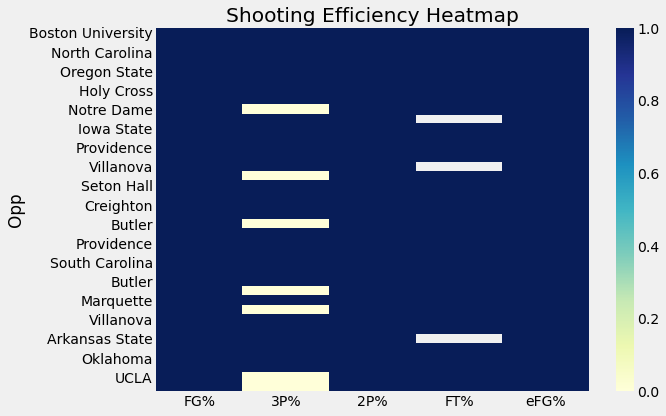

In [59]:
# Heatmap of Efficiency Metrics
efficiency_metrics = ['FG%', '3P%', '2P%', 'FT%', 'eFG%']
efficiency_df = df[['Opp'] + efficiency_metrics].set_index('Opp')

plt.figure(figsize=(10, 6))
sns.heatmap(efficiency_df, annot=False, cmap='YlGnBu', vmin=0, vmax=1)
plt.title('Shooting Efficiency Heatmap')
plt.tight_layout()
plt.show()

<ipython-input-60-06e7fa52b121>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df['Opp'], rotation=45, ha='right')
<ipython-input-60-06e7fa52b121>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df['Opp'], rotation=45, ha='right')
<ipython-input-60-06e7fa52b121>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(df['Opp'], rotation=45, ha='right')


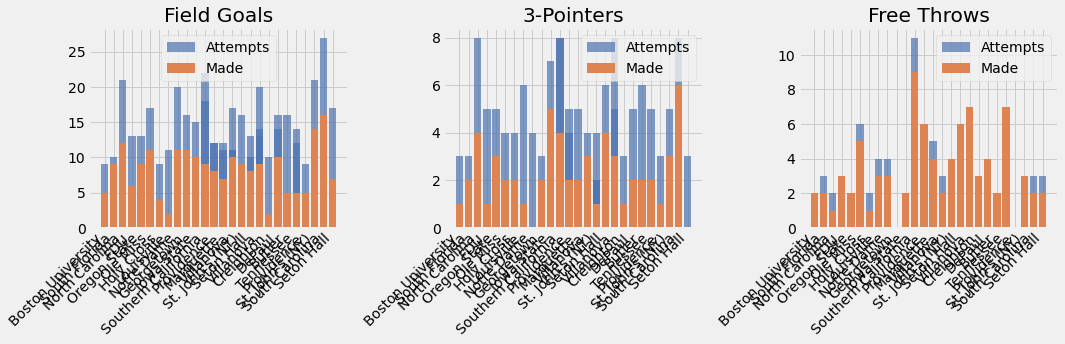

In [60]:
# Attempt-Success Ratio
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Field Goals
axes[0].bar(df['Opp'], df['FGA'], alpha=0.7, label='Attempts')
axes[0].bar(df['Opp'], df['FG'], alpha=1, label='Made')
axes[0].set_title('Field Goals')
axes[0].set_xticklabels(df['Opp'], rotation=45, ha='right')
axes[0].legend()

# 3-Pointers
axes[1].bar(df['Opp'], df['3PA'], alpha=0.7, label='Attempts')
axes[1].bar(df['Opp'], df['3P'], alpha=1, label='Made')
axes[1].set_title('3-Pointers')
axes[1].set_xticklabels(df['Opp'], rotation=45, ha='right')
axes[1].legend()

# Free Throws
axes[2].bar(df['Opp'], df['FTA'], alpha=0.7, label='Attempts')
axes[2].bar(df['Opp'], df['FT'], alpha=1, label='Made')
axes[2].set_title('Free Throws')
axes[2].set_xticklabels(df['Opp'], rotation=45, ha='right')
axes[2].legend()

plt.tight_layout()
plt.show()

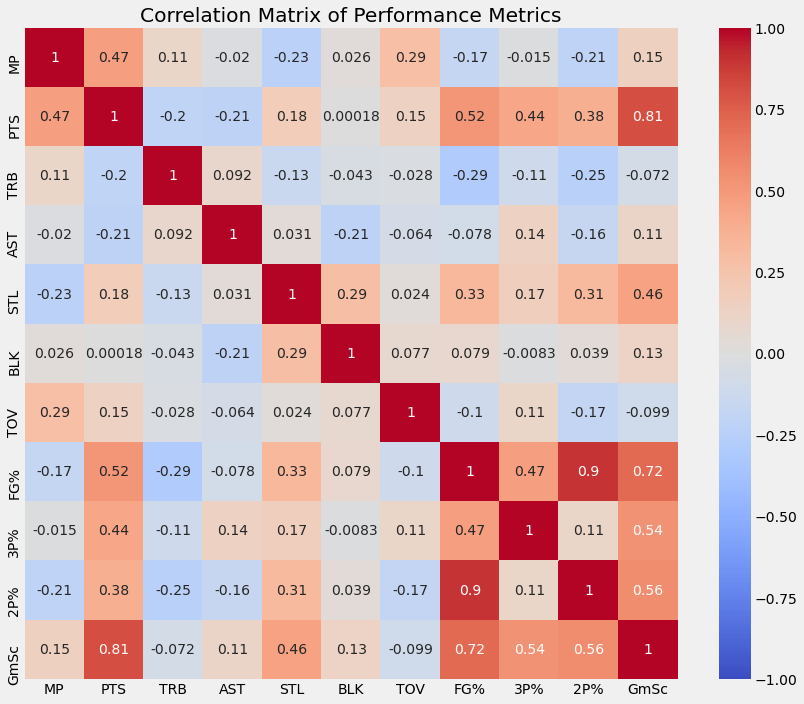

In [61]:
# correlation matrix of various performance metrics
performance_metrics = ['MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'FG%', '3P%', '2P%', 'GmSc']
correlation_df = df[performance_metrics].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Performance Metrics')
plt.tight_layout()
plt.show()